# Forecasting Bitcoin Price

## Initial Motivation

During a wild year in the markets the riskiest asset is one of the popular today. After a historic climb and crash four years ago, bitcoin is at it again in 2021. Like last time, a surge of investor enthusiasm is driving it to all-time highs, and bitcoin enthusiast's say that this is only the beginning. They see bitcoin as a revolution in financial systems, this has been the message for about 11 years and people are finally starting to listen and take note. But many experts watching bitcoin warn that the asset is too volatile for average investors and that its a purely speculative bet that won't be able to scale.

### How Does Bitcoin Work?

The way bitcoin works is key to understanding why it's so popular. Unlike other investments, the cryptocurrency isn't tied to physical assets or the USD. The purpose of bitcoin is just to allow two people anywhere to exchange value directly. What that means is that there is no one central party controlling this network, there is no government, no central bank that could shut down or arbitrarily raise or lower the value.

At its core bitcoin is purely software, it runs on a network of interlinked but independent computers. They form a ledger of transactions between people across the world. Instead of that ledger being controlled by a single master computer or a single party, the information is copied on every computer that is part of the network. This is a cryptocurrency blockchain and it can be viewed by anybody and what that does is it prevents counterfeiting, it prevents double spending, and it makes bitcoin a secure currency.

Every time someone makes a transaction a unique encrypted signature is added to the ledger for verification. Once confirmed and completed that signature cannot be changed, it cannot be altered, and essentially it means you can't counterfeit a bitcoin, that's what keeps the network honest. Bitcoin enthusiasts argue that the network is un-hackable, but that's not necessarily true. The issue is that to hack it you would have to take over the network, you would need your own network of computers running 24/7 and to do that would cost billions of dollars. You can do, but it isn't really feasible. 

And while anyone can download and run the program to become part of the blockchain network, no one has the ability to make universal changes. Bitcoins not yet available to the public are created through a process known as mining. Miners use powerful computers to solve complex math problems to process bitcoin transactions. This process unlocks new digital coins, but these coins aren't limitless. Bitcoin's source code was embedded with the condition that there will always be a finite number of coins available, and this scarcity is what gives bitcoin value.

Currently about 18.5 million of the 21 million maximum bitcoins have already been mined. However, the way the network is set up, every four years the reward per batch of transactions confirmed (per mining puzzle) solved gets cut in half. Due to this condition, the last bitcoin won't be created until 2140. And while the number of available bitcoins is growing the demand for them is growing faster, and this demand has a lot to do with how individual investors are trading.

Bitcoin is becoming easier to buy on apps like Paypal, Square, and Robinhood which is drawing more novice retail investors who are looking for quick returns while trading at home. So far this year, there have been more than 38 million small bitcoin transfers, trades that are less than 1000 dollars, this is up from about 20 million dollars in 2017; larger institutional investors are pilling in was well.

It will be interesting to see to which degree central banks start to digitize their own currencies. As financial systems become more digital, it's leading to bitcoin more mainstream, but the digital currency's resurgence is also closely tied to the state of global finance. When the coronavirus pandemic hit, when the central banks respond the way they did, what they did was push down interest rates and lowered the values of their currencies. That has made bitcoin essentially a hedge against the US Dollar. The value of the dollar is going down then the proponents say that the value of bitcoin should be going up. 

What we have seen is the last couple of months is that people are interested in assets that have high returns. They are willing to take risks and one of the highest returned, highest risk assets anywhere in the capital market is bitcoin. This potential for big profits driving a frenzy of momentum trading, and for many investors these bets are paying off, the digital currency is about 220 percent in the past year. 

One reason investing in bitcoin is so risky is how small the market is, the total value of bitcoin in circulation right now is about 420 billion dollars, in comparison the value of apple stock is about 2 trillion, and the value for the financial market for gold is larger than 12 trillion dollars. Essentially, bitcoin is still very small and so it doesn't take a lot of people to come in and push the value up. The small size of the market contributes to these sort of explosive price moves that we've seen and because the cryptocurrency is decentralized there is no insurance backing it. 

Bitcoin is predicted to Cross 100K USD in the next 1 year and 1 million USD in the next 7-8 years by crypto enthusiasts.

[Source](https://www.youtube.com/watch?v=HhOuvNDMlI0/)

## Data Collection & Preprocessing

So the first thing that we are going to want to do is collect data. We will use Yahoo Bitcoin History, the data is free to download. Available [here](https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD&guccounter=1&guce_referrer=aHR0cHM6Ly90b3dhcmRzZGF0YXNjaWVuY2UuY29tL3ByZWRpY3RpbmctcHJpY2VzLW9mLWJpdGNvaW4td2l0aC1tYWNoaW5lLWxlYXJuaW5nLTNlODNiYjRkZDM1Zg&guce_referrer_sig=AQAAADw3s4Aaum1jPPN-7OIUDQmu6j4SiVGzs0U51SpDhE84Ec30JpqsegxOZYH5lnrNdcM-ZqTtFRI7VLXpikmV4GPDk1ZDnQeBQrtA4W96EdxGo0dwZbtcLWqtK3z3POErPkEb1VvQe0PF8fBlArbyg2HguzJ8pEXcT7ptl3tqR5iZ).

We are also using US Dollar Index Futures Historical Data from Investing.com. Available [here](https://www.investing.com/currencies/us-dollar-index-historical-data).

We want to make sure that we are using enough historical data to make the model more accurate. We are using historical data for bitcoin and usd prices from Aug 2016 to Aug 2021.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import statsmodels.api as smt
from matplotlib import pyplot as plt
from datetime import datetime as dt


In [2]:
# Reading data into dataframes

bitcoin_df = pd.read_csv("newdata/BTC-USD.csv", index_col=0, parse_dates=False)
usd_df = pd.read_csv("newdata/USD.csv", index_col=0, parse_dates=False)

In [3]:
# Explore Data

bitcoin_df.head(10)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-08-25  580.179993  580.450989  575.166992  577.760986  577.760986   
2016-08-26  577.752991  580.622986  576.857971  579.651001  579.651001   
2016-08-27  579.452026  579.844971  568.630005  569.947021  569.947021   
2016-08-28  569.830017  574.038025  569.739990  573.911987  573.911987   
2016-08-29  574.070984  576.278015  573.465027  574.106995  574.106995   
2016-08-30  574.114014  578.356995  574.114014  577.502991  577.502991   
2016-08-31  577.591003  577.861023  573.642029  575.471985  575.471985   
2016-09-01  575.546021  576.310974  571.814026  572.302979  572.302979   
2016-09-02  572.409973  575.643005  570.810974  575.536987  575.536987   
2016-09-03  575.554993  599.500000  574.056030  598.211975  598.211975   

                 Volume  
Date                     
2016-08-25  136130000.0  
2016-08-26   48856800.0  
2016-08-27   59698300.0  
2016-08-28   86301600.0  
2016-08-29  110398000.0  
2016-08-30   70342400.0  
2016-08-31   75840896.0  
2016-09-01   76923400.0  
2016-09-02   79910800.0  
2016-09-03  159014000.0

In [4]:
bitcoin_df.tail(10)

Open          High           Low         Close  \
Date                                                                 
2021-08-16  47019.960938  47998.097656  45700.320313  46004.484375   
2021-08-17  45936.457031  47139.570313  44512.417969  44695.359375   
2021-08-18  44686.750000  45952.062500  44364.027344  44801.187500   
2021-08-19  44741.882813  46970.761719  43998.316406  46717.578125   
2021-08-20  46723.121094  49342.152344  46650.707031  49339.175781   
2021-08-21  49327.074219  49717.019531  48312.199219  48905.492188   
2021-08-22  48869.105469  49471.609375  48199.941406  49321.652344   
2021-08-23  49291.675781  50482.078125  49074.605469  49546.148438   
2021-08-24  49562.347656  49878.769531  47687.117188  47706.117188   
2021-08-25  47901.746094  48554.921875  47185.195313  47943.769531   

               Adj Close        Volume  
Date                                    
2021-08-16  46004.484375  3.277688e+10  
2021-08-17  44695.359375  3.345136e+10  
2021-08-18  44801.187500  3.219412e+10  
2021-08-19  46717.578125  3.720431e+10  
2021-08-20  49339.175781  3.470687e+10  
2021-08-21  48905.492188  4.058521e+10  
2021-08-22  49321.652344  2.537098e+10  
2021-08-23  49546.148438  3.430505e+10  
2021-08-24  47706.117188  3.536117e+10  
2021-08-25  47943.769531  3.268094e+10

In [5]:
usd_df.head(10)

Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2016-08-25  94.779999  94.830002  94.589996  94.769997  94.769997     0.0
2016-08-26  94.709999  95.589996  94.250000  95.570000  95.570000     0.0
2016-08-28        NaN        NaN        NaN        NaN        NaN     NaN
2016-08-29  95.459999  95.830002  95.459999  95.580002  95.580002     0.0
2016-08-30  95.570000  96.139999  95.529999  96.050003  96.050003     0.0
2016-08-31  96.010002  96.260002  95.900002  96.019997  96.019997     0.0
2016-09-01  95.989998  96.239998  95.599998  95.650002  95.650002     0.0
2016-09-02  95.660004  95.959999  95.190002  95.879997  95.879997     0.0
2016-09-04        NaN        NaN        NaN        NaN        NaN     NaN
2016-09-06  95.800003  95.860001  94.769997  94.820000  94.820000     0.0

In [6]:
usd_df.tail(10)

Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2021-08-13  92.970001  93.010002  92.470001  92.519997  92.519997     0.0
2021-08-15        NaN        NaN        NaN        NaN        NaN     NaN
2021-08-16  92.519997  92.660004  92.480003  92.629997  92.629997     0.0
2021-08-17  92.620003  93.169998  92.610001  93.129997  93.129997     0.0
2021-08-18  93.139999  93.260002  92.959999  93.139999  93.139999     0.0
2021-08-19  93.139999  93.580002  93.139999  93.570000  93.570000     0.0
2021-08-20  93.559998  93.730003  93.430000  93.500000  93.500000     0.0
2021-08-22        NaN        NaN        NaN        NaN        NaN     NaN
2021-08-23  93.459999  93.510002  92.949997  92.959999  92.959999     0.0
2021-08-24  92.989998  93.080002  92.809998  92.889999  92.889999     0.0

In [7]:
bitcoin_df.describe()

Open          High           Low         Close     Adj Close  \
count   1823.000000   1823.000000   1823.000000   1823.000000   1823.000000   
mean   11794.896623  12134.462700  11426.226439  11819.491607  11819.491607   
std    13681.493821  14110.888782  13188.260991  13703.276278  13703.276278   
min      569.830017    574.038025    568.630005    569.947021    569.947021   
25%     3939.588379   4039.770264   3866.214600   3949.347168   3949.347168   
50%     7764.057129   7975.974121   7558.399902   7769.219238   7769.219238   
75%    10900.026856  11163.351074  10593.005860  10904.326660  10904.326660   
max    63523.753906  64863.097656  62208.964844  63503.457031  63503.457031   

             Volume  
count  1.823000e+03  
mean   1.839279e+10  
std    2.120929e+10  
min    3.397780e+07  
25%    3.341230e+09  
50%    1.161866e+10  
75%    2.745887e+10  
max    3.509679e+11

In [8]:
usd_df.describe()

Open         High          Low        Close    Adj Close  Volume
count  1246.000000  1246.000000  1246.000000  1246.000000  1246.000000  1246.0
mean     95.447384    95.721766    95.187785    95.457937    95.457937     0.0
std       3.311599     3.324657     3.287314     3.314596     3.314596     0.0
min      88.570000    89.000000    88.250000    88.589996    88.589996     0.0
25%      92.889999    93.132497    92.650002    92.892500    92.892500     0.0
50%      95.785000    96.099998    95.529999    95.790001    95.790001     0.0
75%      97.720001    97.947498    97.477502    97.737499    97.737499     0.0
max     103.260002   103.820000   103.029999   103.290001   103.290001     0.0

In [9]:
bitcoin_df.shape, usd_df.shape

((1827, 6), (1517, 6))

In [10]:
# Removing unnecessary data
bitcoin_df = bitcoin_df.drop(bitcoin_df.columns[[0,1,2,4]], axis=1)
bitcoin_df

Close        Volume
Date                                  
2016-08-25    577.760986  1.361300e+08
2016-08-26    579.651001  4.885680e+07
2016-08-27    569.947021  5.969830e+07
2016-08-28    573.911987  8.630160e+07
2016-08-29    574.106995  1.103980e+08
...                  ...           ...
2021-08-21  48905.492188  4.058521e+10
2021-08-22  49321.652344  2.537098e+10
2021-08-23  49546.148438  3.430505e+10
2021-08-24  47706.117188  3.536117e+10
2021-08-25  47943.769531  3.268094e+10

[1827 rows x 2 columns]

In [11]:
usd_df = usd_df.drop(usd_df.columns[[0,1,2,4,5]], axis=1)
usd_df.head()

Close
Date                 
2016-08-25  94.769997
2016-08-26  95.570000
2016-08-28        NaN
2016-08-29  95.580002
2016-08-30  96.050003

In [12]:
usd_df

Close
Date                 
2016-08-25  94.769997
2016-08-26  95.570000
2016-08-28        NaN
2016-08-29  95.580002
2016-08-30  96.050003
...               ...
2021-08-19  93.570000
2021-08-20  93.500000
2021-08-22        NaN
2021-08-23  92.959999
2021-08-24  92.889999

[1517 rows x 1 columns]

In [13]:
usd_df.shape, bitcoin_df.shape

((1517, 1), (1827, 2))

In [14]:
usd = usd_df
usd.rename(columns={'Close': 'Price'}, inplace=True)

usd

Price
Date                 
2016-08-25  94.769997
2016-08-26  95.570000
2016-08-28        NaN
2016-08-29  95.580002
2016-08-30  96.050003
...               ...
2021-08-19  93.570000
2021-08-20  93.500000
2021-08-22        NaN
2021-08-23  92.959999
2021-08-24  92.889999

[1517 rows x 1 columns]

In [15]:
join = bitcoin_df

for x in join.index.values:
    for x2 in usd.index.values:
        if x == x2:
            itemindex = np.where(usd.index==x2)[0][0]
            val = usd.at[x2, "Price"]
            join.at[x, 'Price'] = val
join.head()

Close       Volume      Price
Date                                          
2016-08-25  577.760986  136130000.0  94.769997
2016-08-26  579.651001   48856800.0  95.570000
2016-08-27  569.947021   59698300.0        NaN
2016-08-28  573.911987   86301600.0        NaN
2016-08-29  574.106995  110398000.0  95.580002

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

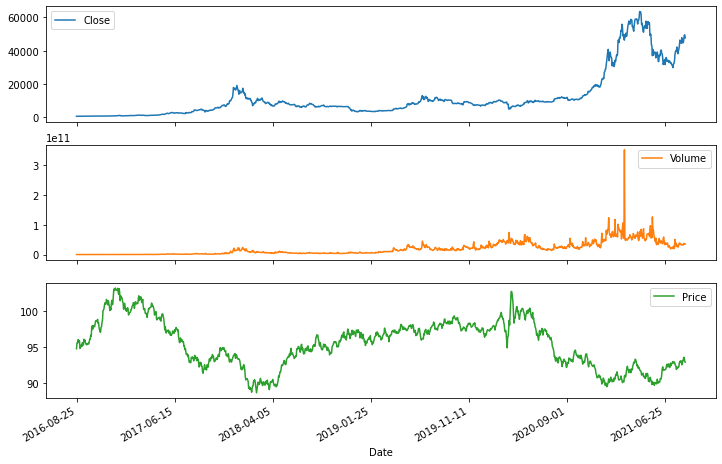

In [16]:
join = join.dropna()
join.plot(subplots=True, figsize=(12,8))

By comparing the prices of bitcoin and usd visually, we can see a peak in bitcoin around 2017-2018 and a decline in the usd around the same time. There is a similar pattern toward the end of 2020 going into 2021. We are going to investigate this further.

In [17]:
def plotcharts(y, title, lags=None, figsize=(12,8)):
    fig = plt.figure(figsize=figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0))
    hist_ax = plt.subplot2grid(layout, (0,1))
    acf_ax = plt.subplot2grid(layout, (1,0))
    pacf_ax = plt.subplot2grid(layout, (1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight="bold")
    y.plot(ax=hist_ax, kind="hist", bins=25)
    hist_ax.set_title("Histogram")
    smt.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [18]:
series = join

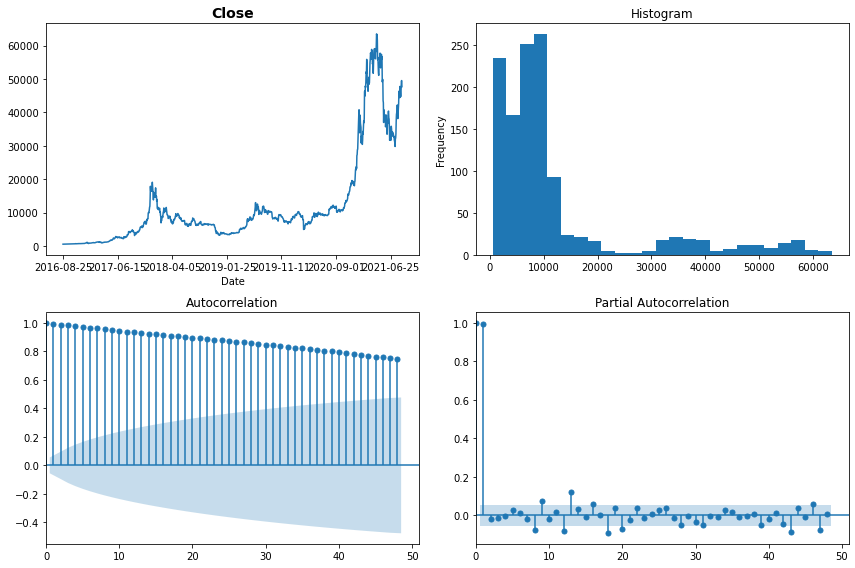

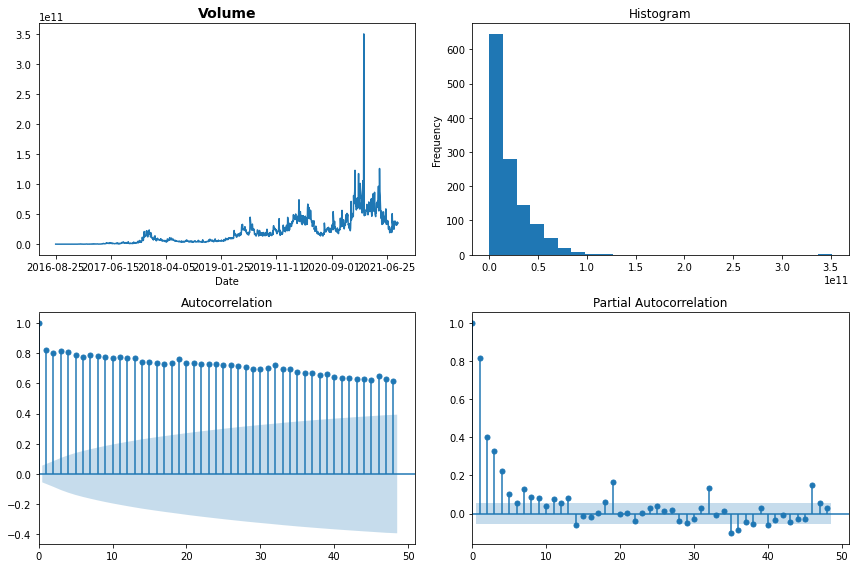

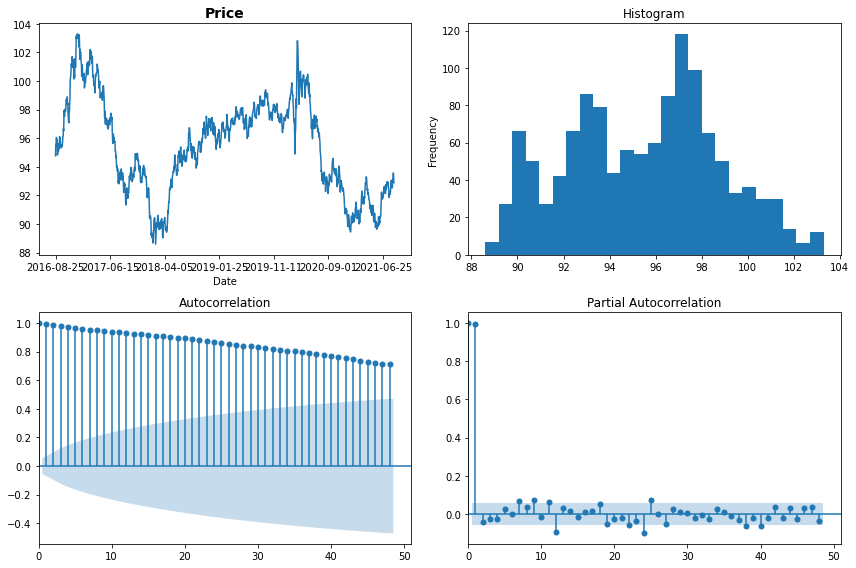

In [19]:
num_var = len(series.iloc[1,:])
for i in range(0, num_var):
    plotcharts(series.iloc[:,i].dropna(), title=series.columns[i], lags=48)

Here we plot four essential graphs that provide us insight into the closing price of bitcoin over this series of time. The bottom two graphs are the gprahs that allow you to look at the dependency structure. They're called the autocorrelation and partial autocorrection function graphs. Each bar on in the autocorrelation function graph captures the series itself and how it is correlated with it's own past. These sort of graphs are very useful for identifying the order of our model.

### Autocorrelation and Partial Autocorrelation

The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF) For example the ACF for a time series  is given by:

\begin{equation*} \mbox{Corr}(y_{t},y_{t-k}). \end{equation*}

This value of k is the time gap being considered and is called the lag. A lag 1 autocorrelation (i.e., k = 1 in the above) is the correlation between values that are one time period apart. More generally, a lag k autocorrelation is the correlation between values that are k time periods apart.

The ACF is a way to measure the linear relationship between an observation at time t and the observations at previous times. If we assume an AR(k) model, then we may wish to only measure the association between  and  and filter out the linear influence of the random variables that lie in between (i.e., ), which requires a transformation on the time series. Then by calculating the correlation of the transformed time series we obtain the partial autocorrelation function (PACF).

The PACF is most useful for identifying the order of an autoregressive model. Specifically, sample partial autocorrelations that are significantly different from 0 indicate lagged terms of  that are useful predictors of . To help differentiate between ACF and PACF, think of them as analogues to  and partial  values as discussed previously.

Graphical approaches to assessing the lag of an autoregressive model include looking at the ACF and PACF values versus the lag. In a plot of ACF versus the lag, if you see large ACF values and a non-random pattern, then likely the values are serially correlated. In a plot of PACF versus the lag, the pattern will usually appear random, but large PACF values at a given lag indicate this value as a possible choice for the order of an autoregressive model. It is important that the choice of the order makes sense. For example, suppose you have blood pressure readings for every day over the past two years. You may find that an AR(1) or AR(2) model is appropriate for modeling blood pressure. However, the PACF may indicate a large partial autocorrelation value at a lag of 17, but such a large order for an autoregressive model likely does not make much sense.

## Stationary Condition

Time series data consists of primary four components:

1. Trend 
2. Seasonality
3. Cyclically
4. Irregularity, sometimes referred to as the random component

#### Trend

- Trend is the increase or decrease in the series over a period of time, it persists over a long period of time.
- Example: Population growth over the years can be seen as an upward trend.

#### Seasonality

- Regular pattern of up and down fluctuations.
- It is a short-term variation occurring due to seasonal factors
- Example: Sales of ice-cream increases during the summer season

#### Cyclically

- It is a medium-term variation caused by circumstances, which repeat in irregular intervals.
- Example: 5 years of economic growth, followed by 2 years of economic recession, followed by 7 years of economic growth followed by 1 year of economic recession

#### Irregularity

- It refers to variations which occur due to unpredictable factors and also do not repeat in particular patterns.
- Example: Variations caused by incidents like earthquake, floods, war, etc.

If the dataset presents all four time series components then the data is non-stationary, which means that typically these components will be present. If the data is not stationary then the time series forecasting will effective. Applying it on a dataset with each component present will not really perform well.

So how do we differentiate between these time series. 

Stationary time series depends on:

1. Mean 
2. Variance
3. Co-variance

## Normalization

Normalized data within statistics, in often involves eliminating units of measurement from a dataset. As a result, this enables us to easily compare data with different scales and are measured from different sources.

Why is Normalized Data Important?
When training a machine learning model, we aim to bring the data to a common scale and so the various features are less sensitive to each other. In this case, we can utilize data normalization as a method of transforming our data, which may be of different units or scales (bitcoin and usd). This allows our model to train using features that could lead to more accurate predictions.

## Transformation

Applying differencing or seasonal differencing log of the series should make the series stationary.

Simply put, stationarity removes trends from the dataset which can be extremely intrusive to our models. Basically, stationarity makes our models perform and predict better.

Close    Volume     Price
0     0.433697  0.969023  0.246040
1     0.460928  0.429279  0.527549
2     0.437012  0.740682  0.312296
3     0.444132  0.638658  0.348165
4     0.456753  0.653433  0.558956
...        ...       ...       ...
1235  0.476015  0.639077  0.311046
1236  0.483965  0.681068  0.521061
1237  0.458245  0.612063  0.309358
1238  0.397687  0.659327  0.316034
1239  0.405727  0.656568  0.532667

[1240 rows x 3 columns]

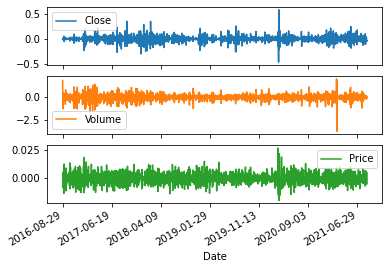

In [20]:
#log transformation
# Converting the data to a logarithmic scale
log = pd.DataFrame(np.log(series))

# Differencing the log values
#1
log_diff = log.diff().dropna()
#2
log_diff = log_diff.diff().dropna()
log_diff.plot(subplots=True)

#normalization
#importing minmaxscaler 
from sklearn.preprocessing import MinMaxScaler

#creating minmaxscaler object
norm = MinMaxScaler()

#applying norm to dataframe
join_norm = pd.DataFrame(norm.fit_transform(log_diff), columns=log_diff.columns)
join_norm

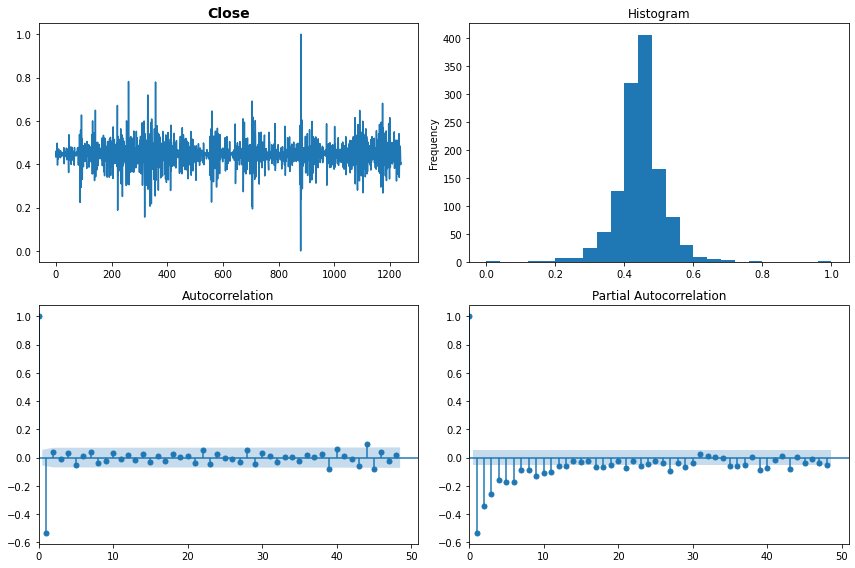

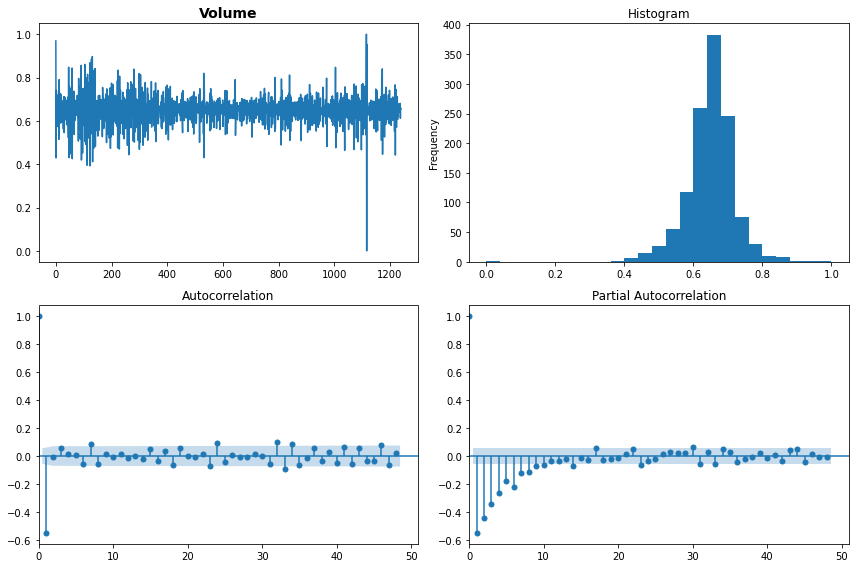

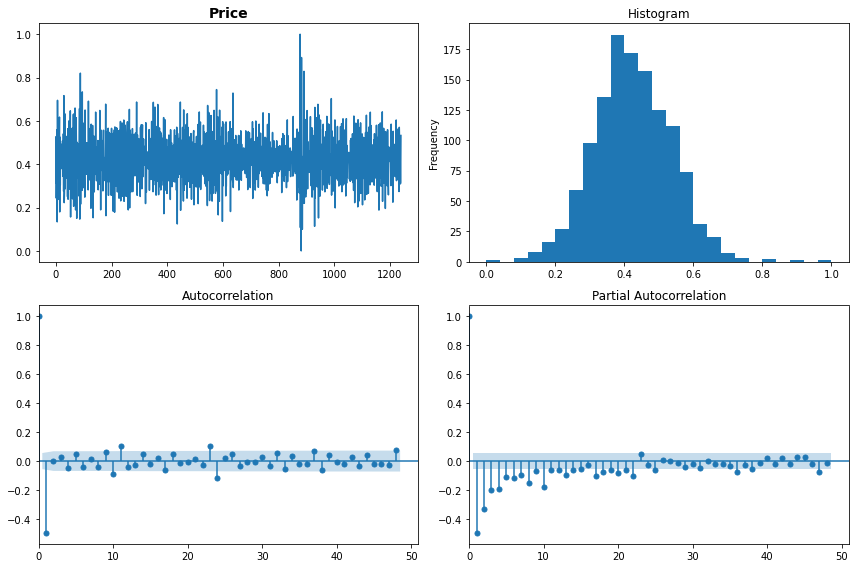

In [21]:
num_var = len(join_norm.iloc[1,:])
for i in range(0, num_var):
    plotcharts(join_norm.iloc[:,i].dropna(), title=join_norm.columns[i], lags=48)

Here we are running a statistical test to determine how well the times series was transformed to be stationary. This is a test that outputs certain statistical patterns that we can use to judge whether each parameter is stationary.

In [22]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag= "AIC")
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num of Observations Used For ADF Regression and Critical Values Calculation : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)
        
ad_test(log_diff["Close"])
print("--------------------------------------------")
ad_test(log_diff["Volume"])
print("--------------------------------------------")
ad_test(log_diff["Price"])


1. ADF :  -11.962248665704678
2. P-Value :  4.0765142208217423e-22
3. Num Of Lags :  23
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1216
5. Critical Values : 
	 1% :  -3.435739110194116
	 5% :  -2.863919777127088
	 10% :  -2.5680370312770515
--------------------------------------------
1. ADF :  -13.579554651182743
2. P-Value :  2.1369110558790328e-25
3. Num Of Lags :  23
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1216
5. Critical Values : 
	 1% :  -3.435739110194116
	 5% :  -2.863919777127088
	 10% :  -2.5680370312770515
--------------------------------------------
1. ADF :  -15.454501413341792
2. P-Value :  2.7565822749269656e-28
3. Num Of Lags :  21
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1218
5. Critical Values : 
	 1% :  -3.435730242325657
	 5% :  -2.863915864680021
	 10% :  -2.5680349476516726


# Models

We will be evaluating three methods for forecasting time series data.
1. Vector Autoregressive (VAR) Model
2. XGBoost Model
3. Facebook Prophet

#### Train-test Set Split

We now have to split the sample into training and validation sets. In time series we have to be careful with this because we cannot simply randomly select a training and testing set, because of the time dependence.

In practice you may need to estimate through a moving window or you train your model using some of the history and then you keep moving forward in order to test your model. 

Our dataset are given within daily intervals and so we can predict up to a particular number of days.

## Vector Autoregressive (AR) Model

VAR models (vector autoregressive models) are used for multivariate time series. The structure is that each variable is a linear function of past lags of itself and past lags of the other variables.

As an example suppose that we measure three different time series variables, denoted by x_{t,1} and x_{t,2}.

The vector autoregressive model of order 1, denoted as VAR(1), is as follows:

\begin{equation*}
x_{t,1} = \alpha_{1} + \phi_{11} x_{t−1,1} + \phi_{12}x_{t−1,2} + \phi_{13}x_{t−1,3} + w_{t,1}
\end{equation*}

\begin{equation*}
x_{t,2} = \alpha_{2} + \phi_{21} x_{t−1,1} + \phi_{22}x_{t−1,2} + \phi_{23}x_{t−1,3} + w_{t,2}
\end{equation*}

Each variable is a linear function of the lag 1 values for all variables in the set.

In a VAR(2) model, the lag 2 values for all variables are added to the right sides of the equations, In the case of three x-variables (or time series) there would be six predictors on the right side of each equation, three lag 1 terms and three lag 2 terms.

In general, for a VAR(p) model, the first p lags of each variable in the system would be used as regression predictors for each variable.

VAR models are a specific case of more general VARMA models. VARMA models for multivariate time series include the VAR structure above along with moving average terms for each variable. More generally yet, these are special cases of ARMAX models that allow for the addition of other predictors that are outside the multivariate set of principal interest.

[Source](https://online.stat.psu.edu/stat510/lesson/11/11.2)

In [23]:
# Splitting the dataset into train & test subsets
n_obs = 7
train, test = log_diff[:-n_obs], log_diff[-n_obs:]
log_diff.head()

Close    Volume     Price
Date                                    
2016-08-29 -0.012876  1.839915 -0.008301
2016-08-30  0.015508 -1.265916  0.004801
2016-08-31 -0.009421  0.525980 -0.005218
2016-09-01 -0.001999 -0.061090 -0.003548
2016-09-02  0.011157  0.023928  0.006262

In [24]:
# Fitting the VAR model
from statsmodels.tsa.api import VAR

model = VAR(log_diff)
results = model.fit(maxlags = 22, ic = 'aic')
results.summary()

C:\Users\Sagar\anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 26, Aug, 2021
Time:                     13:37:04
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -19.0719
Nobs:                     1218.00    HQIC:                  -19.5972
Log likelihood:           7144.02    FPE:                2.24627e-09
AIC:                     -19.9143    Det(Omega_mle):     1.91291e-09
--------------------------------------------------------------------
Results for equation Close
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.000057         0.001435            0.040           0.968
L1.Close          -0.991106         0.029663          -33.412           0.000
L1.Volume          0.012788         0.006343            2.016           

### After fitting the model, we see the results of the model. It provides the coefficient and other stats.

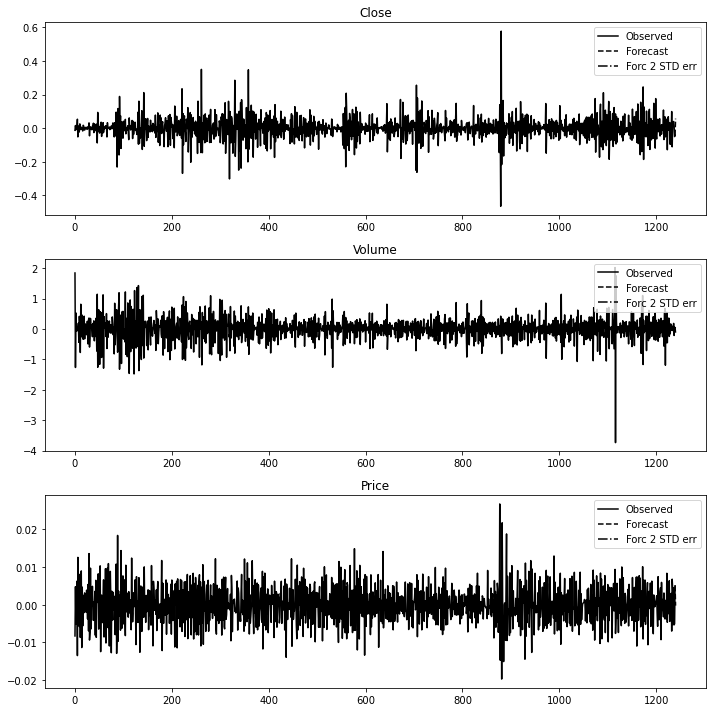

In [25]:
lag_order = results.k_ar
predicted = results.forecast(log_diff.values[-lag_order:],n_obs)
forecast = pd.DataFrame(predicted, index = log_diff.index[-n_obs:], columns = log_diff.columns)


# Plotting the Forecasted values
p1 = results.plot_forecast(1)
p1.tight_layout()

In [26]:
# Inverting the Differencing Transformation
def invert_transformation(df, df_forecast, second_diff):
    for col in df.columns:
        # Undo the 2nd Differencing
        if second_diff:
            df_forecast[str(col)] = (df[col].iloc[-1] - df[col].iloc[-2]) + df_forecast[str(col)].cumsum()
        # Undo the 1st Differencing
        df_forecast[str(col)] = df[col].iloc[-1] + df_forecast[str(col)].cumsum()

    return df_forecast

forecast_values = invert_transformation(train, forecast, second_diff=True)
forecast_values

Close    Volume     Price
Date                                    
2021-08-16  0.280506 -0.168640 -0.017251
2021-08-17  0.457940 -0.175431 -0.027078
2021-08-18  0.626639 -0.216087 -0.037050
2021-08-19  0.790757 -0.239469 -0.047425
2021-08-20  0.966234 -0.252128 -0.057876
2021-08-23  1.125547 -0.253662 -0.064982
2021-08-24  1.276639 -0.269650 -0.073791

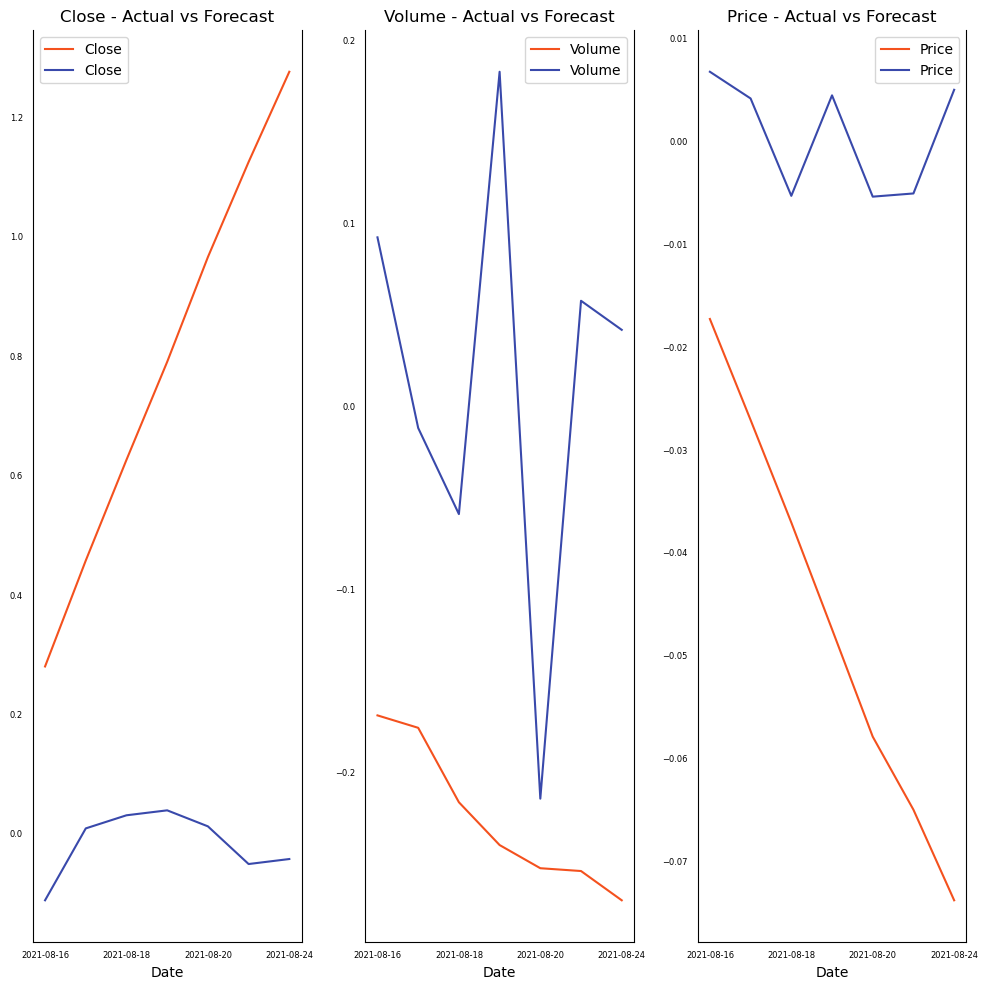

In [27]:
# Actual vs Forecasted Plots
fig, axes = plt.subplots(nrows = int(len(log_diff.columns)/2), ncols = 3, dpi = 100, figsize = (10,10))

for i, (col,ax) in enumerate(zip(log_diff.columns, axes.flatten())):
    forecast_values[col].plot(color = '#F4511E', legend = True, ax = ax).autoscale(axis =' x',tight = True)
    test[col].plot(color = '#3949AB', legend = True, ax = ax)

    ax.set_title(col + ' - Actual vs Forecast')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize = 6)

plt.tight_layout()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
from numpy import asarray as arr
mse = mean_squared_error(test, forecast_values)
print("\nMean Squared Error: ", mse)


Mean Squared Error:  0.2769608828084131


## XGBoost

Usually, ARIMA regressions are used in classical statistical approaches, when the goals not just prediction, but also understanding on how different explanatory variables relate with the dependent variable and with each other. ARIMA are thought specifically for time series data.

On the contrary, XGBoost models are used in pure Machine Learning approaches, where we exclusively care about quality of prediction. XGBoost regressors can be used for time series forecast, even though they are not specifically meant for long term forecasts. But they can work.

#### [What is Boosting and how XGBoost operates?](https://www.datacamp.com/community/tutorials/xgboost-in-python#what)

In [29]:
#importing xgboost and train_test_split
import sys

!{sys.executable} -m pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split

#displaying dataset
log_diff.head()

Close    Volume     Price
Date                                    
2016-08-29 -0.012876  1.839915 -0.008301
2016-08-30  0.015508 -1.265916  0.004801
2016-08-31 -0.009421  0.525980 -0.005218
2016-09-01 -0.001999 -0.061090 -0.003548
2016-09-02  0.011157  0.023928  0.006262

In [30]:
# Splitting the dataset into train & test subsets
X, y = log_diff.iloc[:,:], log_diff.iloc[:,:-2]

data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [31]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 1, alpha = 10, n_estimators = 200)

In [32]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[13:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [33]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.038079


In [34]:
data_dmatrix

### Cross Validation (k-fold)

Since XGBoost is not specific for time series data in order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation via the cv() method. All you have to do is specify the nfolds parameter, which is the number of cross validation sets you want to build.

<small>[Source](https://www.datacamp.com/community/tutorials/xgboost-in-python/)</small>

In [35]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 2, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[13:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [36]:
cv_results.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         0.456616        0.000676        0.456618       0.001583
1         0.413307        0.000598        0.413309       0.001645
2         0.374350        0.000523        0.374389       0.001676
3         0.339426        0.000501        0.339450       0.001685
4         0.308143        0.000457        0.308173       0.001726

In [37]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.049645
Name: test-rmse-mean, dtype: float64


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

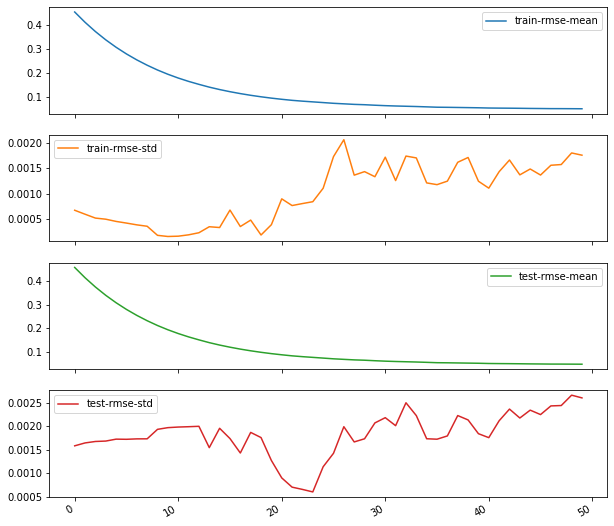

In [38]:
cv_results.plot(subplots=True, figsize=(10,10))

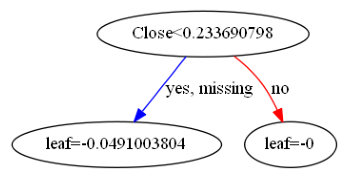

In [39]:
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(xg_reg, {'max_depth': [2,4,6],'n_estimators': [50, 100, 200]}, verbose=1,n_jobs=2)
clf.fit(X, y)

print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[13:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
0.6282298332291705
{'max_depth': 2, 'n_estimators': 200}


## Facebook Prophet

Open-source library available [here](https://facebook.github.io/prophet/)

Facebook prophet was created to work as a tool for most general time series predictions. It is easy to use and it teaches beginners machine learning in an intuitive way.

Facebook also allows for those with domain knowledge to not be blocked when they get an answer and get some additional insight that may yield some value.

If you use other forecasting libraries. Those other libraries have done a lot of the foundational work and forecasting that they have two automated methods in the library one is auto.arima and the other is exponential smoothing. They both perform a model selection process so they're really trying to do a lot of work for you and take a lot of difficulty out of building the model, but sometimes you would get bad performing models, if you were to simply apply it to a dataset. As the results aren't always intuitive enough to make the forecast better.

Facebook prophet is able to visualize significant features in the time series such as trends, outliers, seasonality, etc. Also, the forecasting method is robust enough to handle any missing values.

So typically with times series problems you would want to model the generative process of how this times series would be created. That becomes difficult to write, a generative model for a time series process is like at each state a new issue is going to happen and it is going to depend on the past in some way. Instead, facebook built a discriminative model, which is a simple decomposable time series model. It's a generalized additive model so each component is additive but the individual components may not be linear.

\begin{equation*}
y(t) = \text{piecewise_trend}(t) + \text{seasonality}(t) + \text{holiday_effects}(t) + \text{noise}
\end{equation*}

The first component is a piecewise trend, that could either be a logistic trend or a linear trend, and that's going to account for basically how fast the time series is growing or declining.

The second component is seasonality, that is something that happens regularly in cycles. There is some holiday effects and noise reduction included.

The piecewise trend is developed using L1-regularized trend shifts. The seasonality is developed using Fourier series. And the holiday effects are developed using dummy variables. They aren't too complex.

The piecewise linear trend or the logistic trend  is developed by generating a bunch a candidate change points. These are point where the model is it thinking could potentially change its trajectory, then they place a Laplace prior, which is like a sparse prior, on it's going to assume that most of time those changes are zero, but some of the time it's going to allow it to change. So the data is basically going to tell us when the time series has shifted its trajectory, which is a really nice feature. So prophet is learning from the data how to extrapolate locally from modeling from the past data.

[Source](https://www.youtube.com/watch?v=pOYAXv15r3A&feature=youtu.be)

In [41]:
#importing prophet and fitting model
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go

In [42]:
#functions to automate prophet charts for each series
def fit_model(df):
    m = Prophet(daily_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    return m, forecast, future

def fb_plots(m, fore):
    return plot_plotly(m, forecast)

def fb_subplots(m, fore):
    return m.plot(forecast), m.plot_components(forecast)

### Bitcoin Closing Price Forecast

In [43]:
bc = pd.read_csv("newdata/BTC-USD.csv")

bc_price = bc.drop(bc.columns[[1,2,3,5,6]], axis=1)
bc_vol = bc.drop(bc.columns[[1,2,3,4,5]], axis=1)
bc_price.columns = ["ds","y"]
bc_vol.columns = ["ds","y"]
bc_price.head()

ds           y
0  2016-08-25  577.760986
1  2016-08-26  579.651001
2  2016-08-27  569.947021
3  2016-08-28  573.911987
4  2016-08-29  574.106995

In [44]:
model, forecast, future = fit_model(bc_price)

In [45]:
future.tail()

ds
2187 2022-08-21
2188 2022-08-22
2189 2022-08-23
2190 2022-08-24
2191 2022-08-25

In [46]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower     yhat_upper
2187 2022-08-21  88463.391410  76030.778197  100886.198024
2188 2022-08-22  88612.923173  76024.571615  100230.484480
2189 2022-08-23  88692.262027  76795.346493  100762.832016
2190 2022-08-24  88781.620587  75888.510378  100629.976352
2191 2022-08-25  88862.588452  76586.863455  101293.036728

In [47]:
fb_plots(model, forecast)

The forecast is expecting bitcoin to continue rising in value. There has a been a new spike at the end of 2020 that added to this prediction. 

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

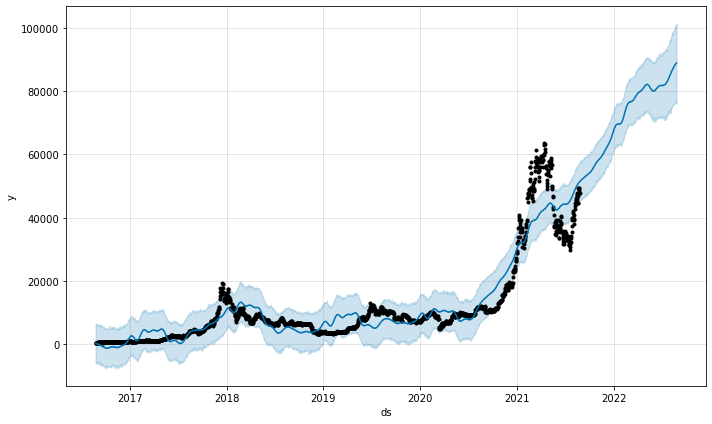

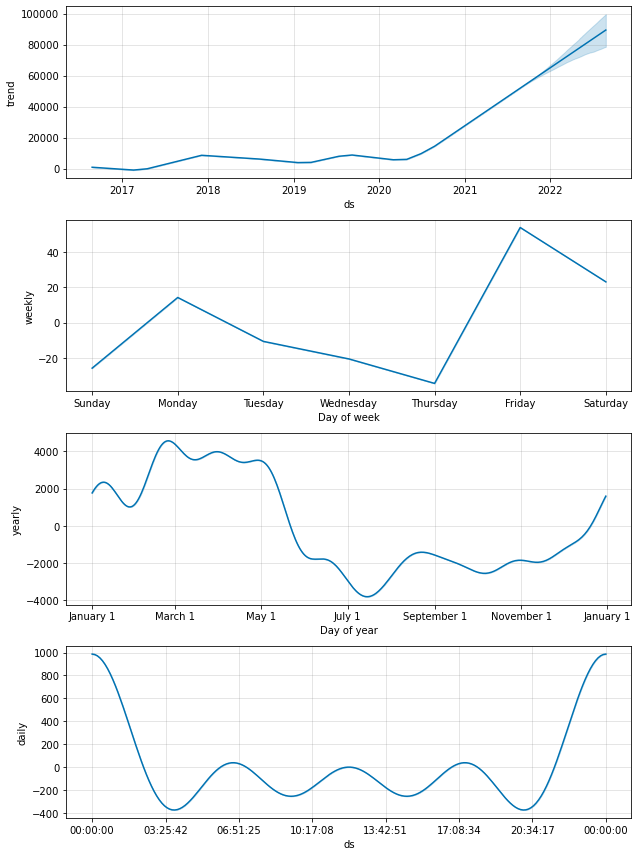

In [48]:
fb_subplots(model, forecast)

### US Price Forecast

In [50]:
usd = pd.read_csv("newdata/USD.csv")
usd = usd.drop(usd.columns[[2,3,4,5,6]], axis=1)
usd.columns = ["ds","y"]
usd.head()

ds          y
0  2016-08-25  94.779999
1  2016-08-26  94.709999
2  2016-08-28        NaN
3  2016-08-29  95.459999
4  2016-08-30  95.570000

In [51]:
model, forecast, future = fit_model(usd)

In [52]:
future.tail()

ds
1877 2022-08-20
1878 2022-08-21
1879 2022-08-22
1880 2022-08-23
1881 2022-08-24

In [53]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
1877 2022-08-20  91.592208   69.599360  112.879910
1878 2022-08-21  91.600121   69.496457  112.735000
1879 2022-08-22  91.420953   69.199100  111.879747
1880 2022-08-23  91.433388   68.842571  112.316496
1881 2022-08-24  91.432580   68.654308  112.491658

In [54]:
fb_plots(model, forecast)

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

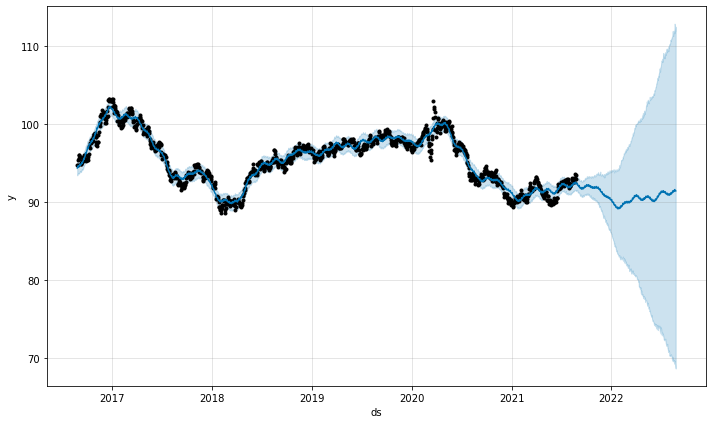

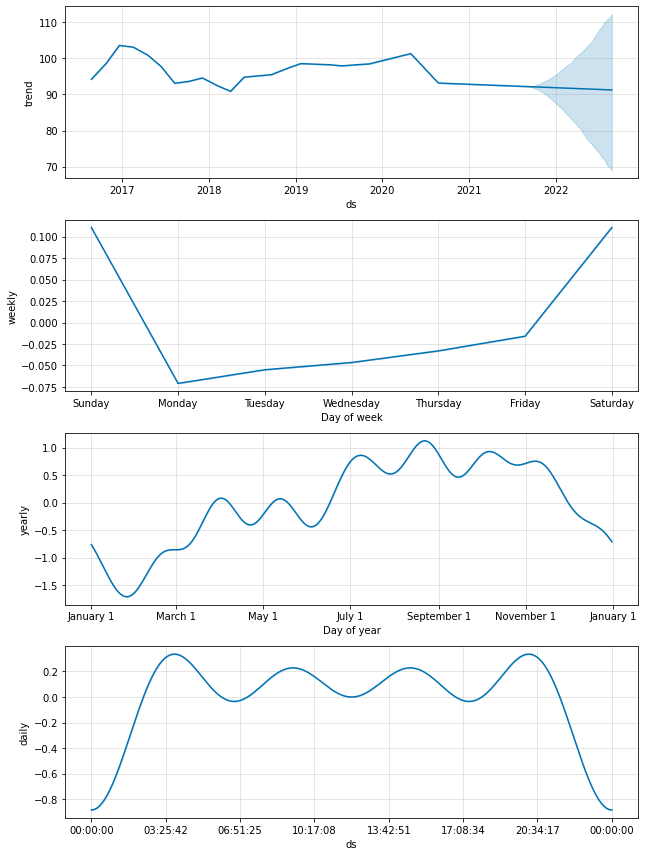

In [55]:
fb_subplots(model, forecast)

### Bitcoin Volume Forecast

In [56]:
bc_vol.head()

ds            y
0  2016-08-25  136130000.0
1  2016-08-26   48856800.0
2  2016-08-27   59698300.0
3  2016-08-28   86301600.0
4  2016-08-29  110398000.0

In [57]:
model, forecast, future = fit_model(bc_vol)

In [58]:
future.tail()

ds
2187 2022-08-21
2188 2022-08-22
2189 2022-08-23
2190 2022-08-24
2191 2022-08-25

In [59]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
2187 2022-08-21  5.611148e+10  5.019879e+09  1.062244e+11
2188 2022-08-22  5.842648e+10  4.846977e+09  1.076052e+11
2189 2022-08-23  5.837519e+10  8.862702e+09  1.099430e+11
2190 2022-08-24  5.917159e+10  9.734112e+09  1.118608e+11
2191 2022-08-25  5.956783e+10  6.917752e+09  1.126437e+11

In [60]:
fb_plots(model, forecast)

We are easily able o view a forecast for the volume of bitcoin. The forecast is predicting the trend to countine to rise. We can most likely attribute this to the levels of users trading on robinhood or other platforms. There is growing demand and as more individuals buy in the more bitcoin is in cirruculation throughout the economy.

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

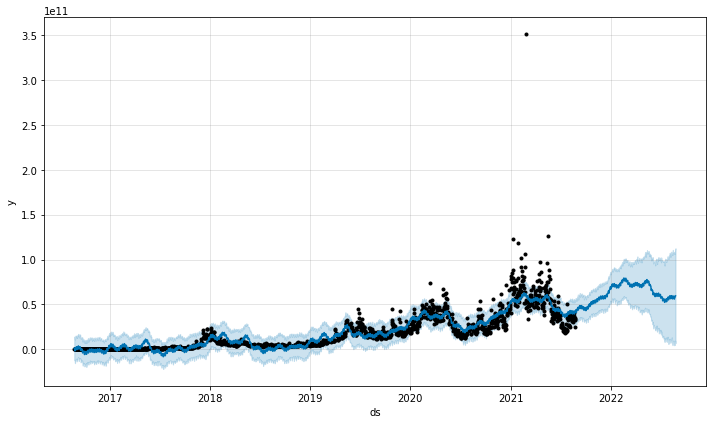

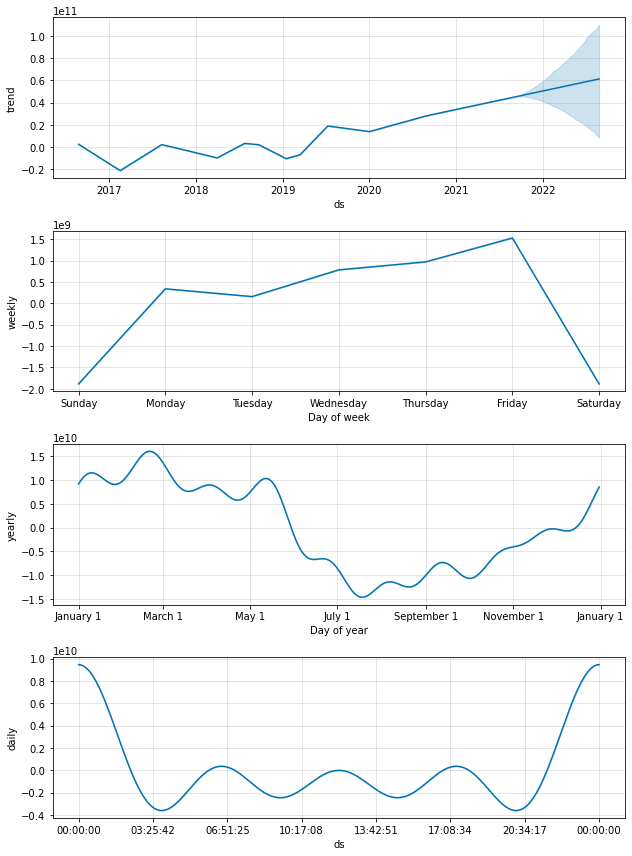

In [61]:
fb_subplots(model, forecast)

Prophet easily allows us to quick view forecasts for an individual series. Here we were able to do so for the Bitcoin closing price, the USD price, and the colume of Bitcoin. These variables are important because, as mentioned in the being analysts are considering the surge in bitcoin due to the ease of individuals being able to trade via robinhood and other apps, as well as a hedge against the US Dollar because of the current state of global affairs.

According to the forecasts for each series, at least for the near future we are going to continue to see bitcoin to rise in value. This could be attributed to the forecast that the US Dollar to decrease and the forecast that the amount of bitcoin is curriculation is also going to increase.

The initial two models (VAR & XGBoost) were able to determine at least one of these insights, but not as easily or quickly as prophet.